=== Object Detection Basics ===
1. Object detection finds objects in images
2. It draws bounding boxes around objects
3. It labels what each object is
4. It gives confidence scores for each detection

=== Loading Model ===


c:\Users\moham\Documents\Aimodels\newenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\moham\Documents\Aimodels\newenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to C:\Users\moham/.cache\torch\hub\checkpoints\fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100.0%


Model loaded successfully!

Total classes: 91
Some common classes: person, car, cell phone, laptop

WELCOME TO OBJECT DETECTION TUTORIAL

CODE EXPLANATION

1. Model Loading
----------------

        We use Faster R-CNN with ResNet-50 backbone pre-trained on COCO dataset.
        The model has been trained on 91 classes and can detect multiple objects.

        Key components:
        - Backbone: Extracts features from image (ResNet-50)
        - RPN: Region Proposal Network suggests possible object locations
        - ROI Heads: Classifies objects and refines bounding boxes
        

2. Image Preprocessing
----------------------

        Steps in preprocessing:
        1. Convert image to RGB format
        2. Transform to PyTorch tensor
        3. Normalize pixel values (0-1 range)
        4. Add batch dimension for model input

        The model expects images in specific format and size.
        

3. Object Detection Process
---------------------------

        How detection works:


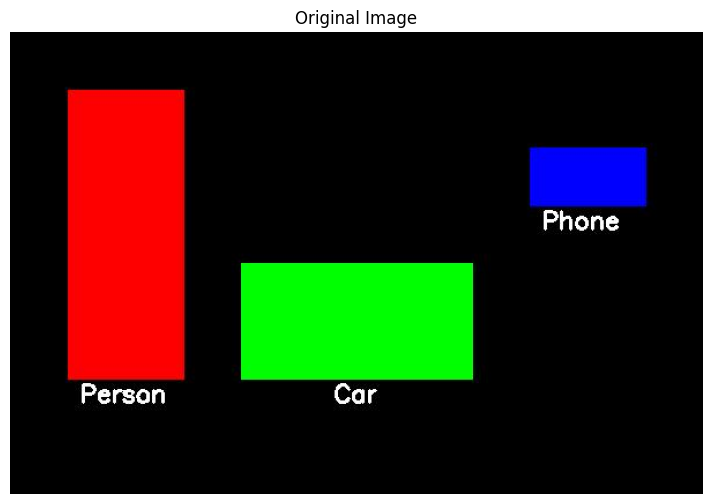

Step 2: Preprocessing image...
Step 3: Running object detection...
Step 4: Visualizing results...


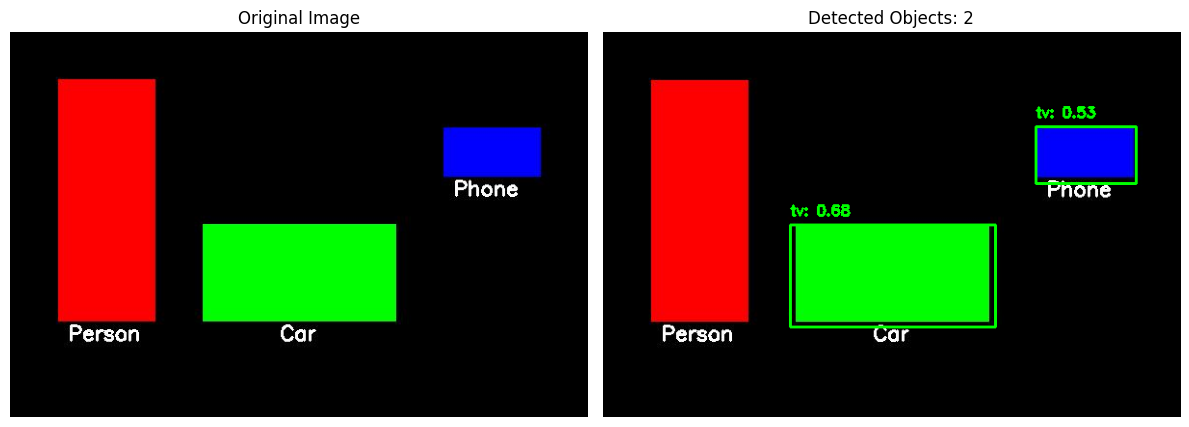

Step 5: Generating summary...

DETECTION SUMMARY

Detection 1:
  Class: tv
  Confidence: 67.60%
  Bounding Box: [194, 200, 407, 306]
  Width: 212px, Height: 106px

Detection 2:
  Class: tv
  Confidence: 52.81%
  Bounding Box: [449, 98, 553, 157]
  Width: 103px, Height: 59px

✅ Detection complete!
Total objects detected: 2

Object Count by Class:
  tv: 2

MENU:
1. Test with sample image
2. Use your own image
3. View COCO classes
4. Exit

COCO Dataset Classes (91 total):
----------------------------------------
 1. person
 2. bicycle
 3. car
 4. motorcycle
 5. airplane
 6. bus
 7. train
 8. truck
 9. boat
10. traffic light
11. fire hydrant
13. stop sign
14. parking meter
15. bench
16. bird
17. cat
18. dog
19. horse
20. sheep
21. cow
22. elephant
23. bear
24. zebra
25. giraffe
27. backpack
28. umbrella
31. handbag
32. tie
33. suitcase
34. frisbee
35. skis
36. snowboard
37. sports ball
38. kite
39. baseball bat
40. baseball glove
41. skateboard
42. surfboard
43. tennis racket
44. bottle
46

In [1]:


# Step 1: Import Libraries
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Step 3: Understand Object Detection Basics
print("=== Object Detection Basics ===")
print("1. Object detection finds objects in images")
print("2. It draws bounding boxes around objects")
print("3. It labels what each object is")
print("4. It gives confidence scores for each detection")

# Step 4: Load a Pre-trained Model
print("\n=== Loading Model ===")
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set to evaluation mode
print("Model loaded successfully!")

# Step 5: Prepare COCO Class Labels
coco_classes = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

print(f"\nTotal classes: {len(coco_classes)}")
print("Some common classes: person, car, cell phone, laptop")

# Step 6: Load and Display Image
def load_image(image_path):
    """Load and display image"""
    image = Image.open(image_path).convert("RGB")
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
    return image

# Step 7: Preprocess Image for Model
def preprocess_image(image):
    """Convert image to tensor format"""
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    return transform(image).unsqueeze(0)  # Add batch dimension

# Step 8: Perform Object Detection
def detect_objects(model, image_tensor, confidence_threshold=0.5):
    """Run object detection on image"""
    with torch.no_grad():  # Disable gradient calculation for inference
        predictions = model(image_tensor)
    
    # Get predictions
    boxes = predictions[0]['boxes'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()
    
    # Filter by confidence threshold
    keep = scores >= confidence_threshold
    boxes = boxes[keep]
    scores = scores[keep]
    labels = labels[keep]
    
    return boxes, scores, labels

# Step 9: Visualize Results
def visualize_detections(image, boxes, scores, labels):
    """Draw bounding boxes and labels on image"""
    # Convert PIL Image to numpy array
    image_np = np.array(image)
    
    # Create figure
    plt.figure(figsize=(12, 8))
    
    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')
    
    # Create copy for visualization
    vis_image = image_np.copy()
    
    # Draw bounding boxes
    for i, (box, score, label) in enumerate(zip(boxes, scores, labels)):
        if score > 0.5:  # Only show high confidence detections
            x1, y1, x2, y2 = map(int, box)
            class_name = coco_classes[label]
            
            # Draw rectangle
            cv2.rectangle(vis_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            # Add label
            label_text = f"{class_name}: {score:.2f}"
            cv2.putText(vis_image, label_text, (x1, y1-10), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # Display detected image
    plt.subplot(1, 2, 2)
    plt.imshow(vis_image)
    plt.title(f"Detected Objects: {len(boxes)}")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Step 10: Print Detection Summary
def print_detection_summary(boxes, scores, labels):
    """Print detailed detection results"""
    print("\n" + "="*50)
    print("DETECTION SUMMARY")
    print("="*50)
    
    for i, (box, score, label) in enumerate(zip(boxes, scores, labels)):
        class_name = coco_classes[label]
        print(f"\nDetection {i+1}:")
        print(f"  Class: {class_name}")
        print(f"  Confidence: {score:.2%}")
        print(f"  Bounding Box: [{int(box[0])}, {int(box[1])}, {int(box[2])}, {int(box[3])}]")
        print(f"  Width: {int(box[2] - box[0])}px, Height: {int(box[3] - box[1])}px")

# Step 11: Complete Pipeline Function
def run_object_detection(image_path, confidence_threshold=0.5):
    """Complete object detection pipeline"""
    
    print(f"\nProcessing image: {image_path}")
    print("-" * 40)
    
    # 1. Load image
    print("Step 1: Loading image...")
    image = load_image(image_path)
    
    # 2. Preprocess image
    print("Step 2: Preprocessing image...")
    image_tensor = preprocess_image(image)
    
    # 3. Run detection
    print("Step 3: Running object detection...")
    boxes, scores, labels = detect_objects(model, image_tensor, confidence_threshold)
    
    # 4. Visualize results
    print("Step 4: Visualizing results...")
    visualize_detections(image, boxes, scores, labels)
    
    # 5. Print summary
    print("Step 5: Generating summary...")
    print_detection_summary(boxes, scores, labels)
    
    print(f"\n✅ Detection complete!")
    print(f"Total objects detected: {len(boxes)}")
    
    # Count objects by class
    from collections import Counter
    class_counts = Counter([coco_classes[label] for label in labels])
    
    print("\nObject Count by Class:")
    for class_name, count in class_counts.items():
        if class_name != '__background__':
            print(f"  {class_name}: {count}")

# Step 12: Test with Sample Image
def test_with_sample():
    """Test the object detector"""
    
    # If you don't have an image, you can create a simple one
    print("Creating a sample image for testing...")
    
    # Create a simple image with colored rectangles
    sample_image = np.zeros((400, 600, 3), dtype=np.uint8)
    
    # Draw some objects (simulating person, car, phone)
    cv2.rectangle(sample_image, (50, 50), (150, 300), (255, 0, 0), -1)  # Blue - person
    cv2.rectangle(sample_image, (200, 200), (400, 300), (0, 255, 0), -1)  # Green - car
    cv2.rectangle(sample_image, (450, 100), (550, 150), (0, 0, 255), -1)  # Red - phone
    
    # Add text
    cv2.putText(sample_image, "Person", (60, 320), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
    cv2.putText(sample_image, "Car", (280, 320), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
    cv2.putText(sample_image, "Phone", (460, 170), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
    
    # Convert to PIL Image
    pil_image = Image.fromarray(sample_image)
    
    # Save sample image
    pil_image.save("sample_test_image.jpg")
    
    # Run detection on sample image
    run_object_detection("sample_test_image.jpg", confidence_threshold=0.3)

# Step 13: Main Execution
def main():
    """Main function to run object detection"""
    
    print("="*60)
    print("SIMPLE OBJECT DETECTION TUTORIAL")
    print("="*60)
    
    while True:
        print("\n" + "="*40)
        print("MENU:")
        print("1. Test with sample image")
        print("2. Use your own image")
        print("3. View COCO classes")
        print("4. Exit")
        
        choice = input("\nEnter your choice (1-4): ")
        
        if choice == '1':
            test_with_sample()
            
        elif choice == '2':
            image_path = input("Enter image path (or drag & drop image here): ").strip().strip("'\"")
            try:
                confidence = float(input("Enter confidence threshold (0.1-0.9, default 0.5): ") or 0.5)
                run_object_detection(image_path, confidence)
            except Exception as e:
                print(f"Error: {e}")
                print("Make sure the image path is correct!")
                
        elif choice == '3':
            print("\nCOCO Dataset Classes (91 total):")
            print("-" * 40)
            for i, class_name in enumerate(coco_classes):
                if class_name != 'N/A' and class_name != '__background__':
                    print(f"{i:2d}. {class_name}")
                    
        elif choice == '4':
            print("\nThank you for using Simple Object Detection!")
            break
            
        else:
            print("Invalid choice. Please try again.")

# Step 14: Understanding the Code (Educational Section)
def explain_code():
    """Explain how the code works"""
    
    explanations = {
        "1. Model Loading": """
        We use Faster R-CNN with ResNet-50 backbone pre-trained on COCO dataset.
        The model has been trained on 91 classes and can detect multiple objects.
        
        Key components:
        - Backbone: Extracts features from image (ResNet-50)
        - RPN: Region Proposal Network suggests possible object locations
        - ROI Heads: Classifies objects and refines bounding boxes
        """,
        
        "2. Image Preprocessing": """
        Steps in preprocessing:
        1. Convert image to RGB format
        2. Transform to PyTorch tensor
        3. Normalize pixel values (0-1 range)
        4. Add batch dimension for model input
        
        The model expects images in specific format and size.
        """,
        
        "3. Object Detection Process": """
        How detection works:
        1. Model processes image through convolutional layers
        2. RPN generates region proposals (possible object locations)
        3. Features are pooled from each region
        4. Network classifies each region and refines bounding boxes
        5. Non-maximum suppression removes overlapping boxes
        """,
        
        "4. Post-processing": """
        After detection:
        1. Filter by confidence score (e.g., keep only >50% confidence)
        2. Convert bounding boxes to image coordinates
        3. Map class IDs to readable names
        4. Draw boxes and labels on image
        """,
        
        "5. Applications": """
        Real-world applications:
        - Surveillance systems
        - Autonomous vehicles
        - Retail analytics
        - Medical imaging
        - Agriculture monitoring
        - Sports analytics
        """
    }
    
    print("\n" + "="*60)
    print("CODE EXPLANATION")
    print("="*60)
    
    for title, explanation in explanations.items():
        print(f"\n{title}")
        print("-" * len(title))
        print(explanation)

# Step 15: Run the complete tutorial
if __name__ == "__main__":
    print("\n" + "="*60)
    print("WELCOME TO OBJECT DETECTION TUTORIAL")
    print("="*60)
    
    # Explain the code first
    explain_code()
    
    # Run the main program
    main()